<a href="https://www.kaggle.com/code/devanggiri/linear-regression-guide?scriptVersionId=158603368" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Linear Regression

Sales Prediction

The aim is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataset = pd.read_csv(r"/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv")

In [3]:
dataset.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dataset = dataset.drop(columns=dataset.columns[0])

In [5]:
dataset.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Pre-Processing

In [6]:
dataset.shape

(200, 4)

**1. Checking for missing values**

In [7]:
dataset.isna().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

**Conclusion:** The dataset does not have missing values

**2. Checking for duplicate rows**

In [8]:
dataset.duplicated().any()

False

**Conclusion:** There are no duplicate rows present in the dataset

**3. Checking for outliers**

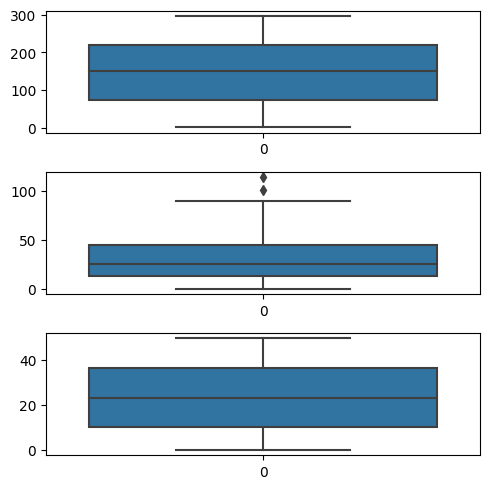

In [9]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV Ad Budget ($)'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper Ad Budget ($)'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio Ad Budget ($)'], ax =axs[2])
plt.tight_layout()

**Conclusion:** There are not that extreme values present in the dataset

# Exploratory Data Analysis

**1. Distribution of the target variable**

/tmp/ipykernel_18/15521653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales ($)']);


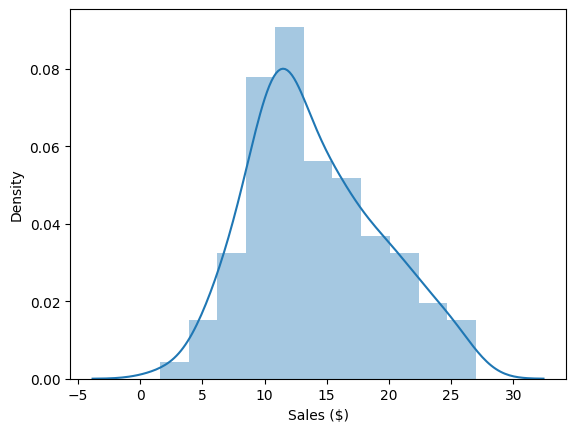

In [10]:
sns.distplot(dataset['Sales ($)']);

**Conclusion:** It is normally distributed

**2. How Sales are related with other variables**

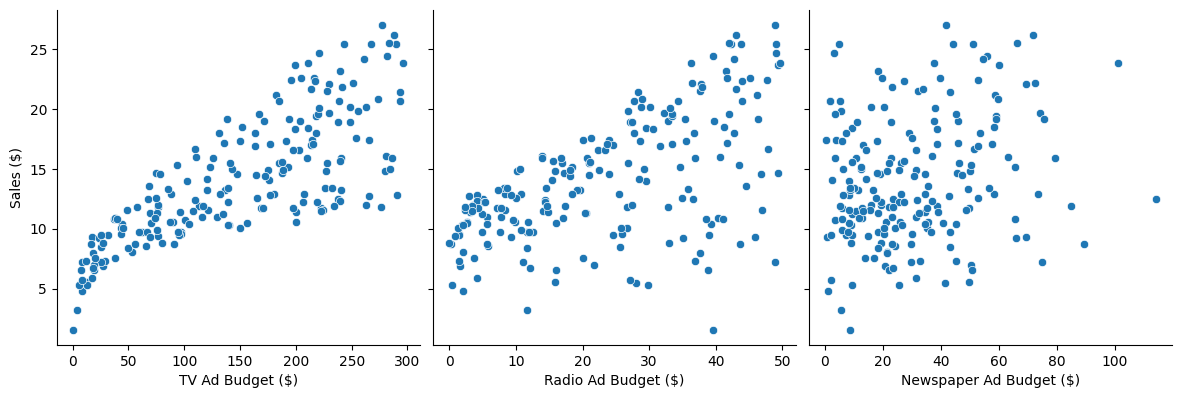

In [11]:
sns.pairplot(dataset, x_vars=['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)'], y_vars='Sales ($)', height=4, aspect=1, kind='scatter')
plt.show()

**Conclusion:** TV is strongly, positively, linearly correlated with the target variable. Bu the Newspaper feature seems to be uncorrelated

**3. Heatmap**

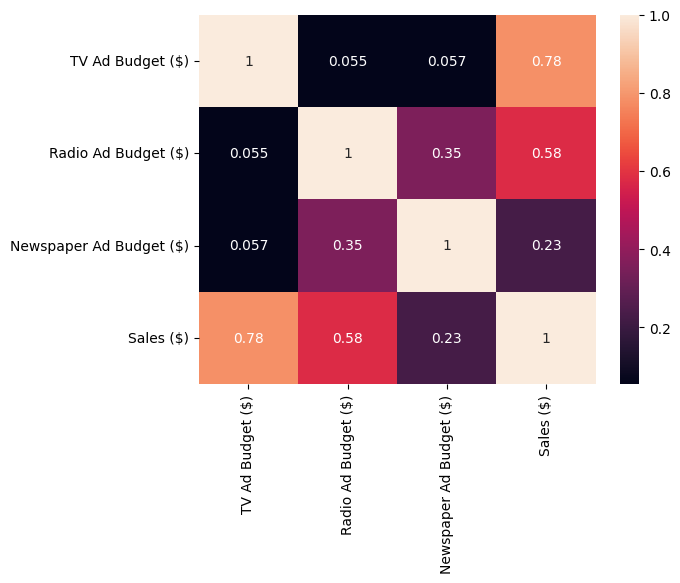

In [12]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

**Conclusion:** TV seems to be most correlated with Sales as 0.9 is very close to 1

# Model Building

**Linear Regression**

Simple linear regression has only one x and one y variable. It is an approach for predicting a quantitative response using a single feature.

It establishes the relationship between two variables using a straight line. Linear regression attempts to draw a line that comes closest to the data by finding the slope and intercept that define the line and minimize regression errors.

**Formula:** Y = β0 + β1X + e

    Y = Dependent variable / Target variable
    β0 = Intercept of the regression line
    β1 = Slope of the regression lime which tells whether the line is increasing or decreasing
    X = Independent variable / Predictor variable
    e = Error
    
**Equation:** Sales = β0 + β1X + TV

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
#Setting the value for X and Y
x = dataset[['TV Ad Budget ($)']]
y = dataset['Sales ($)']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [16]:
slr= LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [17]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  6.98966585741168
Coefficient: [0.04649736]


In [18]:
print('Regression Equation: Sales = 6.948 + 0.054 * TV')

Regression Equation: Sales = 6.948 + 0.054 * TV


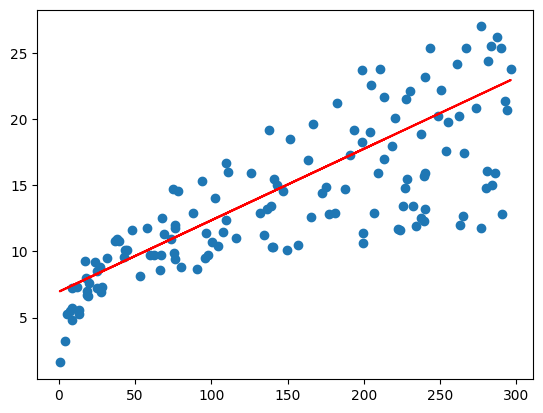

In [19]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [20]:
#Prediction of Test and Training set result
y_pred_slr= slr.predict(x_test)
x_pred_slr= slr.predict(x_train)

In [21]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747 16.60531965
 13.4620982  16.17754395 17.05169429 17.07029323 12.4391563  17.66080969
  9.60281742 15.72186983 11.04423554 11.36971705 13.95032046 14.90351632
 14.59198401 12.23921766 16.97264878 13.00642408 16.07524976 15.21969836
 15.58702749 17.23303399 17.20978531 10.49091697 15.58702749 12.71349072
 10.1700852  10.19798361 12.61584627 15.74976825  9.31453379 12.59259759
 11.50920913 14.81982107 17.33067844 15.97295557 17.00519693 15.15925179
 14.63848137 17.14933874 12.57864838 11.16047894  7.77547122 18.55820871
 10.27237939  8.76586496 16.405381   14.95466341 10.4816175  13.08546959
 16.78665935  9.05879832  7.78942043  8.17999824 16.17754395 10.9744895 ]


In [22]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
126,6.6,7.352345
104,20.7,18.065337
99,17.2,13.276109
92,19.4,17.112141
111,21.8,18.228077
167,12.2,16.605320
116,12.2,13.462098
96,11.7,16.177544
52,22.6,17.051694
69,22.3,17.070293


In [23]:
#Predict for any value
slr.predict([[56]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.59351795])

**Conclusion:** The model predicted the Sales of 10.003 in that market

In [24]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 61.02


**Conclusion:** 81.10% of the data fit the regression model

In [25]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 2.161984932672072
Mean Square Error: 7.975798532854851
Root Mean Square Error: 2.8241456288327007
